In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras

In [10]:
from keras import layers

[3.2094106  3.67945811 4.46904021 ... 3.94586242 6.14417026 0.76046968]


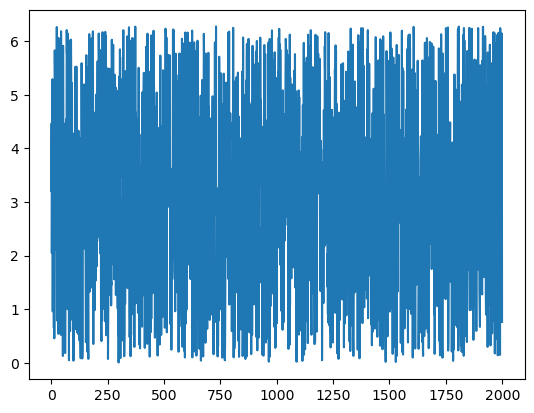

In [11]:
SAMPLES = 2000

np.random.seed(3000)
# tf.random.set_seed(3000)
x_values = np.random.uniform(low=0, high= 2*math.pi, size= SAMPLES)
plt.plot(x_values)
print(x_values)

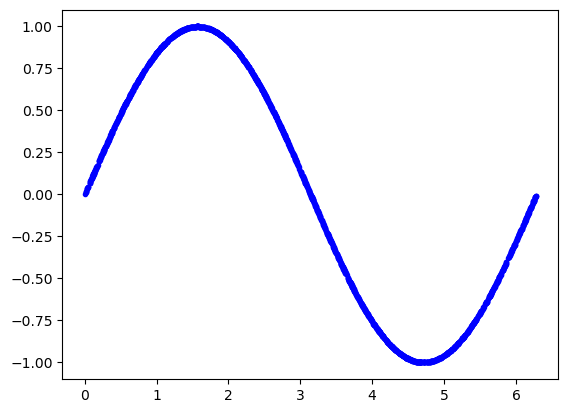

In [12]:
np.random.shuffle(x_values)
y_values= np.sin(x_values)
plt.plot(x_values, y_values, 'b.')


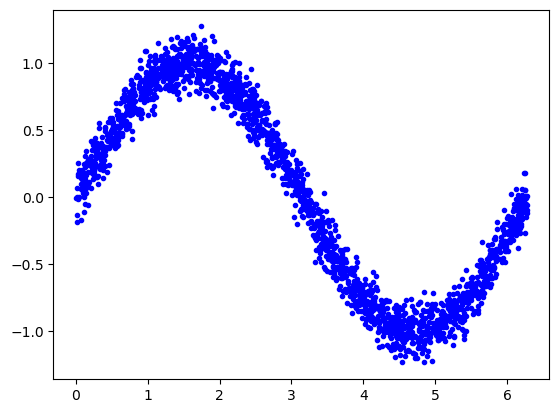

In [13]:
y_values += 0.1* np.random.randn(*y_values.shape)
plt.plot(x_values, y_values,'b.')


In [14]:
train_ds=int(0.6*SAMPLES)
test_ds = int(0.2*SAMPLES + train_ds)
x_train, x_validate, x_test = np.split(x_values,[train_ds,test_ds])
y_train, y_validate, y_test = np.split(y_values, [train_ds,test_ds])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

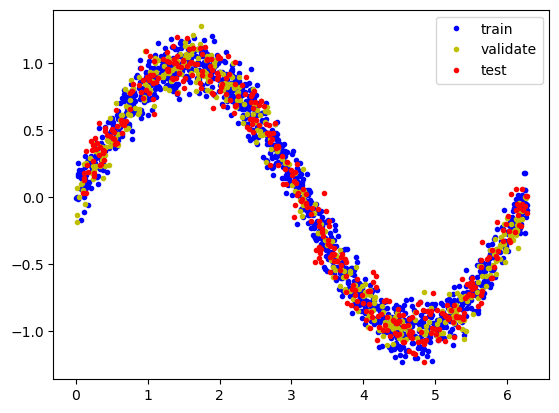

In [15]:
plt.plot(x_train, y_train, 'b.', label='train')
plt.plot(x_validate, y_validate, 'y.', label='validate')
plt.plot(x_test, y_test, 'r.', label='test')
plt.legend()



In [34]:
model = tf.keras.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(1,)))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/home/abhishek/miniconda3/envs/tff/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 18)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,297 (8.97 KB)

 Trainable params: 2,297 (8.97 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_1 = model.fit(x_train, y_train, epochs=40, batch_size=16, validation_data=(x_validate,y_validate))

Epoch 1/10


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.4514 - mae: 0.5924 - val_loss: 0.3120 - val_mae: 0.4889
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2377 - mae: 0.4185 - val_loss: 0.1095 - val_mae: 0.2687
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0992 - mae: 0.2410 - val_loss: 0.0701 - val_mae: 0.2028
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0635 - mae: 0.1809 - val_loss: 0.0574 - val_mae: 0.1823
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mae: 0.1624 - val_loss: 0.0374 - val_mae: 0.1486
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0391 - mae: 0.1478 - val_loss: 0.0250 - val_mae: 0.1249
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0291 - mae: 0.1327 - val_loss: 0.0189 - val_mae: 0.1079
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0178 - mae: 0.1028 - val_loss: 0.0140 - val_mae: 0.0934
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183 - mae: 0.1064 - v

In [36]:
model.save("sine_model.keras")

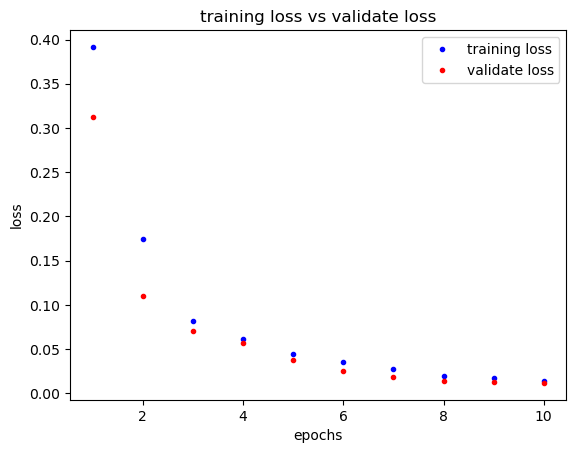

In [37]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'b.', label='training loss')
plt.plot(epochs, val_loss, 'r.', label='validate loss')
plt.title('training loss vs validate loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0156 - mae: 0.0976
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


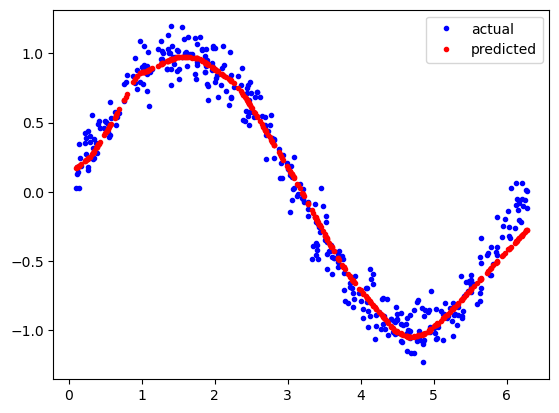

In [38]:
loss = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)
plt.clf()
plt.plot(x_test, y_test, 'b.', label='actual')
plt.plot(x_test, predictions, 'r.', label='predicted')
plt.legend()


In [39]:
print(loss) #rashad code

[0.015813441947102547, 0.09867382049560547]


In [40]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("c_model.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmp8edbhatr/assets


INFO:tensorflow:Assets written to: /tmp/tmp8edbhatr/assets


Saved artifact at '/tmp/tmp8edbhatr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139045748626528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748626176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748767024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748766848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748827232: Tens

W0000 00:00:1728107781.011142 2343112 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1728107781.011192 2343112 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-05 11:26:21.011558: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp8edbhatr
2024-10-05 11:26:21.013199: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-05 11:26:21.013220: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp8edbhatr
2024-10-05 11:26:21.024964: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-05 11:26:21.078007: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp8edbhatr
2024-10-05 11:26:21.091352: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load for tags { serve }; Status: success: OK. Took 79804 microseconds.


12252

In [41]:

c_model = tf.lite.Interpreter('c_model.tflite')
# Allocate memory for each model

c_model.allocate_tensors()
# Get indexes of the input and output tensors

c_model_input_index =c_model.get_input_details()[0]["index"]
c_model_output_index =c_model.get_output_details()[0]["index"]
# Create arrays to store the results

c_model_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([np.expand_dims(x_value, axis = 0)], dtype=np.float32)
  # Write the value to the input tensor
  c_model.set_tensor(c_model_input_index, x_value_tensor)
  # Run inference
  c_model.invoke()
  # Read the prediction from the output tensor
  c_model_predictions.append(c_model.get_tensor(c_model_output_index)[0])
  print(c_model_predictions)


[array([-0.5823724], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32), array([0.665018], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32), array([0.665018], dtype=float32), array([0.18569195], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32), array([0.665018], dtype=float32), array([0.18569195], dtype=float32), array([0.28559732], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32), array([0.665018], dtype=float32), array([0.18569195], dtype=float32), array([0.28559732], dtype=float32), array([0.8124896], dtype=float32)]
[array([-0.5823724], dtype=float32), array([0.3274023], dtype=float32), array([0.665018], dtype=float32), array([0.18569195], dtype=float32), array([0.28559732], dtype=float32), array([0.8124896], dtype=float32), array([-0.7800064], dtype=float32)]
[ar

In [42]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("sine_model.tflite", "wb").write(tflite_model)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset():
  for value in x_test:
# Each scalar value must be inside of a 2D array that is wrapped in a list
     yield [np.array(value, dtype=np.float32, ndmin=2)]
# converter.representative_dataset = representative_dataset_generator
# # Convert the model
# tflite_model = converter.convert()
# # Save the model to disk
# open("c_model.tflite", "wb").write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmp62j41clu/assets


INFO:tensorflow:Assets written to: /tmp/tmp62j41clu/assets


Saved artifact at '/tmp/tmp62j41clu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139045748626528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748626176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748767024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748766848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748827232: Tens

W0000 00:00:1728107787.750604 2343112 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1728107787.750640 2343112 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-05 11:26:27.751102: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp62j41clu
2024-10-05 11:26:27.753435: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-05 11:26:27.753463: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp62j41clu
2024-10-05 11:26:27.766002: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-05 11:26:27.806309: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp62j41clu
2024-10-05 11:26:27.814897: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load for tags { serve }; Status: success: OK. Took 63801 microseconds.


In [43]:
# import os
# non_quantized_model_size = os.path.getsize("c_model.tflite")
# print("non_quantized model is %d bytes" % non_quantized_model_size)


In [44]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_FP16_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprfb9pev_/assets


INFO:tensorflow:Assets written to: /tmp/tmprfb9pev_/assets


Saved artifact at '/tmp/tmprfb9pev_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139045748626528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748626176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748767024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748766848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748827232: Tens

W0000 00:00:1728107788.269718 2343112 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1728107788.269747 2343112 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-05 11:26:28.270062: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmprfb9pev_
2024-10-05 11:26:28.271568: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-05 11:26:28.271587: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmprfb9pev_
2024-10-05 11:26:28.282392: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-05 11:26:28.321074: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmprfb9pev_
2024-10-05 11:26:28.330800: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load for tags { serve }; Status: success: OK. Took 60741 microseconds.


9108

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

# Save the model to disk
open("sine_model_INT8_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppmsol955/assets


INFO:tensorflow:Assets written to: /tmp/tmppmsol955/assets


Saved artifact at '/tmp/tmppmsol955'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139045748626528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748626176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748700256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748662336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748694176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748767024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748766848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139045748827232: Tens

/home/abhishek/miniconda3/envs/tff/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1728107788.980808 2343112 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1728107788.980840 2343112 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-05 11:26:28.981188: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppmsol955
2024-10-05 11:26:28.982907: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-05 11:26:28.982928: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmppmsol955
2024-10-05 11:26:28.994763: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-05 11:26:29.034362: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path

9108

In [46]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_FP16_quantized.tflite')
# sine_model_INT8_quantized = tf.lite.Interpreter('sine_model_INT8_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
sine_model_input = sine_model.tensor(sine_model.get_input_details()[0]["index"])
sine_model_output = sine_model.tensor(sine_model.get_output_details()[0]["index"])
sine_model_quantized_input = sine_model_quantized.tensor(sine_model_quantized.get_input_details()[0]["index"])
sine_model_quantized_output = sine_model_quantized.tensor(sine_model_quantized.get_output_details()[0]["index"])

# Create arrays to store the results
sine_model_predictions = np.empty(x_test.size)
sine_model_quantized_predictions = np.empty(x_test.size)

# Run each model's interpreter for each value and store the results in arrays
for i in range(x_test.size):
  sine_model_input().fill(x_test[i])
  sine_model.invoke()
  sine_model_predictions[i] = sine_model_output()[0]

  sine_model_quantized_input().fill(x_test[i])
  sine_model_quantized.invoke()
  sine_model_quantized_predictions[i] = sine_model_quantized_output()[0]

/tmp/ipykernel_2343112/2431584483.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sine_model_predictions[i] = sine_model_output()[0]
/tmp/ipykernel_2343112/2431584483.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sine_model_quantized_predictions[i] = sine_model_quantized_output()[0]


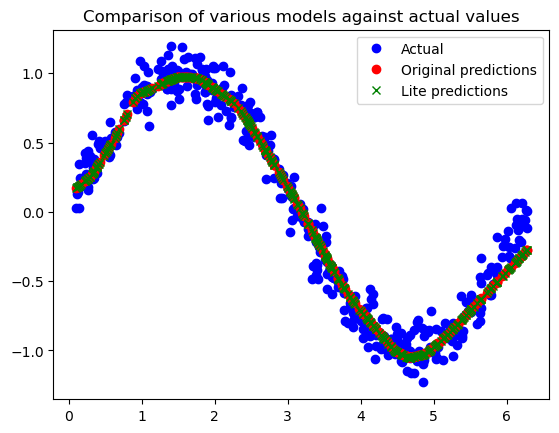

In [47]:
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite predictions')
plt.legend()
plt.show()

In [48]:
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_FP16_quantized.tflite > sine_model_FP16_quantized.cc
# Print the source file
!cat sine_model_FP16_quantized.cc

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
unsigned char sine_model_FP16_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0x20, 0x01, 0x00, 0x00, 0x28, 0x15, 0x00, 0x00,
  0x38, 0x15, 0x00, 0x00, 0x20, 0x23, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x60,